In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

In [22]:
true = pd.read_csv("data/True.csv")
fake = pd.read_csv("data/Fake.csv")

In [23]:
pd.set_option('display.max_colwidth',200)

In [24]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fis...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after Pres...",politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some ...",politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the N...",politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online r...",politicsNews,"December 29, 2017"


In [25]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former...",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia inve...",News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Bar...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned T...,News,"December 25, 2017"


In [26]:
true['isfake'] = 0
fake['isfake'] = 1

#### Merging both true and fake datasets

In [28]:
df = pd.concat([true,fake])

In [29]:
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fis...",politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after Pres...",politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some ...",politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the N...",politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online r...",politicsNews,"December 29, 2017",0


In [7]:
df.iloc[0]['text']

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [14]:
true.loc[8]['text']

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Together, we are MAKING AMERICA GREAT AGAIN! bit.ly/2lnpKaq [1814 EST] - In the East, it could be the COLDEST New Year’s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up! [1901 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) '

### Removing Patterns
#### There were mentions (@realDonaldTrump) and links (bit.ly/2lnpKaq). We clean these patterns.

###### Removing mentions and links

In [30]:
def remov_pattern(pattern,text):
    text = re.sub(pattern,'',text)
    return text

In [31]:
#removing mentions
pattern = "@[\w]*"
df['text'] = df['text'].apply(lambda x:remov_pattern(pattern,x))

#removing links(bit.ly/2lnpKaq)
pattern = r"bit.ly/\S*"
df['text'] = df['text'].apply(lambda x:remov_pattern(pattern,x))

###### Retaining only alphabets

In [32]:
df['text'] = df['text'].apply(lambda x:re.sub("[^a-zA-Z]"," ",x))

Turning paragraphs to lowercase and splitting into words

In [33]:
df['text'] = df['text'].apply(lambda x:x.lower())
df['text'] = df['text'].apply(lambda x:word_tokenize(x))

###### Removing stopwords

In [34]:
stop = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x:[a for a in x if a not in stop])

In [35]:
# stemmer = PorterStemmer()
# df['text'] = df['text'].apply(lambda x:[stemmer.stem(i) for i in x])

In [36]:
lemma = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x:[lemma.lemmatize(i) for i in x])

In [37]:
df['text'] = df['text'].apply(lambda x:' '.join(x))

In [38]:
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip their fiscal script",washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits on Monday: Pentagon,washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling bl...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',washington reuters special counsel investigation link russia president trump election campaign continue without interference despite call trump administration ally republican lawmaker shut promine...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,washington reuters trump campaign adviser george papadopoulos told australian diplomat may russia political dirt democratic presidential candidate hillary clinton new york time reported saturday c...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,seattle washington reuters president donald trump called u postal service friday charge much ship package amazon amzn picking another fight online retail giant criticized past united state post of...,politicsNews,"December 29, 2017",0


In [37]:
stop_words = set(stopwords.words('english'))

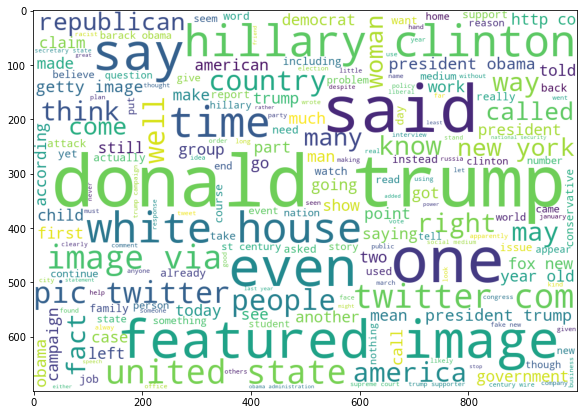

In [39]:
words_fake = ' '.join(text for text in df[df['isfake']==1]['text'])
cloud_fake = WordCloud(background_color="white",height=700,width=1000).generate(words_fake)
plt.figure(figsize=(10,7))
plt.imshow(cloud_fake)

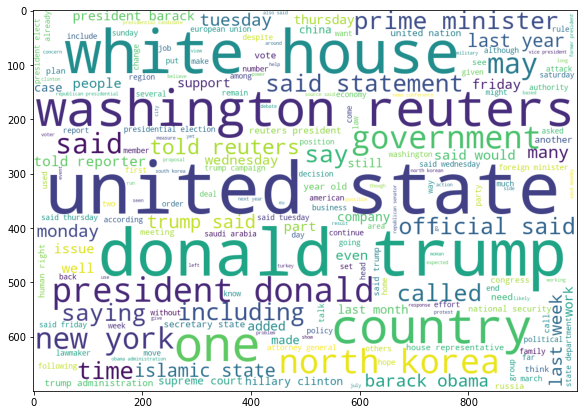

In [40]:
words_true = ' '.join(text for text in df[df['isfake']==0]['text'])
cloud_true = WordCloud(background_color="white",height=700,width=1000).generate(words_true)
plt.figure(figsize=(10,7))
plt.imshow(cloud_true)

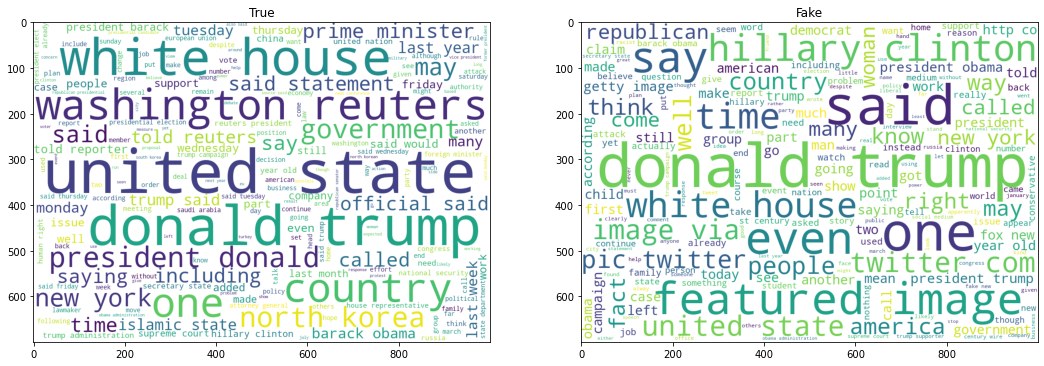

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,10))
ax1.title.set_text("True")
ax1.imshow(cloud_true)
plt.title("Fake")
ax2.imshow(cloud_fake)
plt.show()

In [58]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['isfake'],test_size=0.3,random_state=0)

In [59]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [60]:
tfidf = TfidfVectorizer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [61]:
nb = MultinomialNB()
nb.fit(X_train_cv,y_train)
y_pred_cv = nb.predict(X_test_cv)
acc_nb_cv = accuracy_score(y_pred_cv,y_test)
print(acc_nb_cv)

0.9527839643652561


In [62]:
nb2 = MultinomialNB()
nb2.fit(X_train_tf,y_train)
y_pred_tf = nb.predict(X_test_tf)
acc_nb_tf = accuracy_score(y_pred_tf,y_test)
print(acc_nb_tf)

0.9390497401633259


In [63]:
log_cv = LogisticRegression()
log_cv.fit(X_train_cv,y_train)
y_pred_cv = log_cv.predict(X_test_cv)
acc_log_cv = accuracy_score(y_pred_cv,y_test)
print(acc_log_cv)

0.9965850037119525


In [64]:
log_tf = LogisticRegression()
log_tf.fit(X_train_tf,y_train)
y_pred_tf = log_tf.predict(X_test_tf)
acc_log_tf = accuracy_score(y_pred_tf,y_test)
print(acc_log_tf)

0.9856718634001485


In [65]:
# Logistic Regression with tfidf performs best
acc_log_cv 

0.9965850037119525